In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

tensor([-25.], device='cuda:0') tensor(167.7881, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(100.3326, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(51.0053, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(18.7690, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(2.6275, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(1.6246, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(14.8425, device='cuda:0', dtype=torch.float64)


/home/jp/miniforge3/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


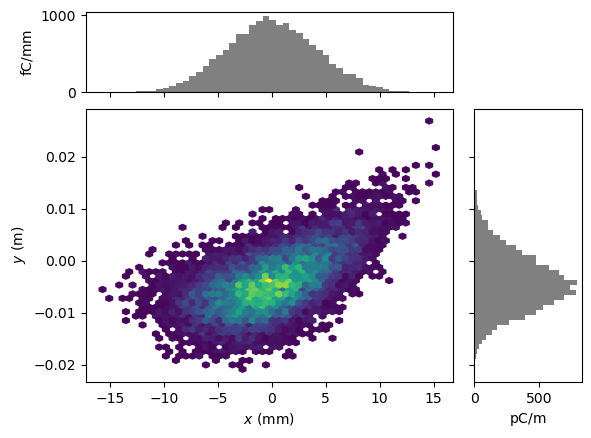

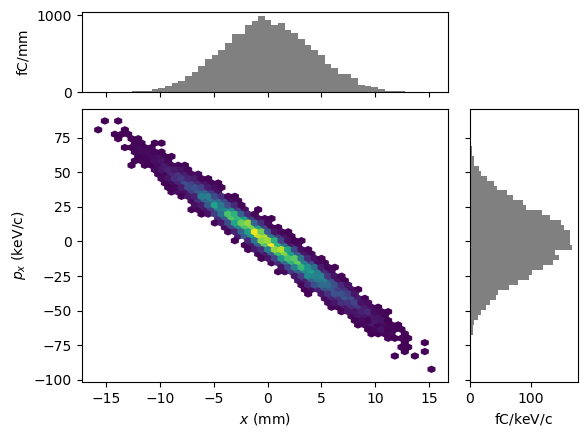

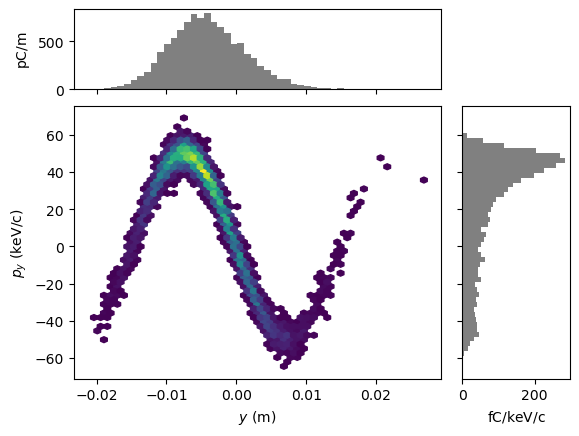

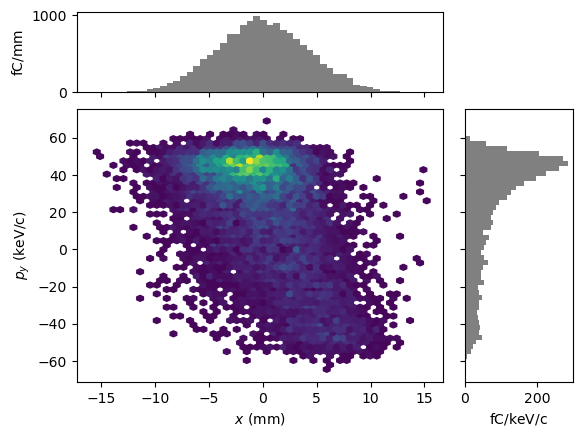

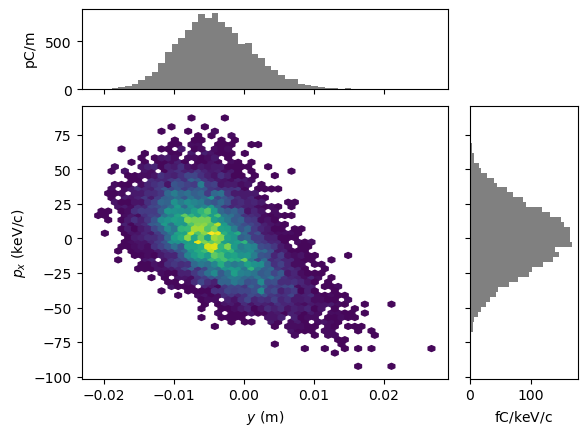

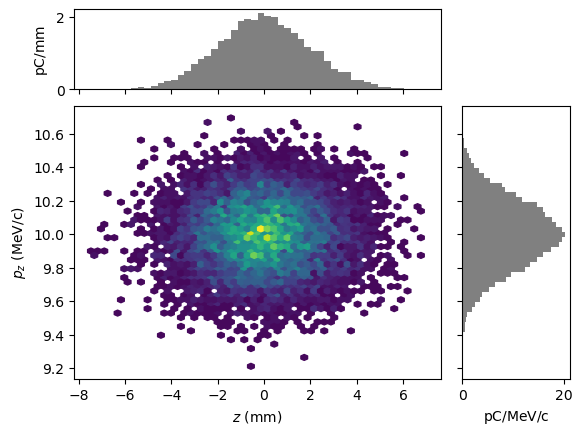

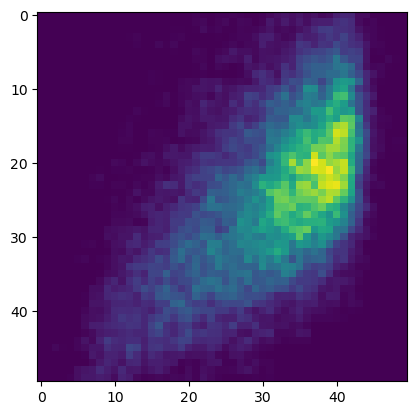

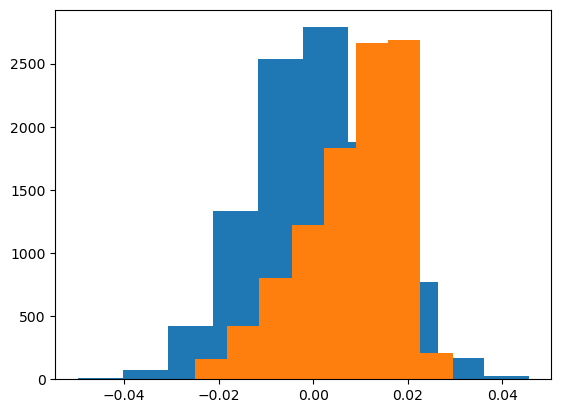

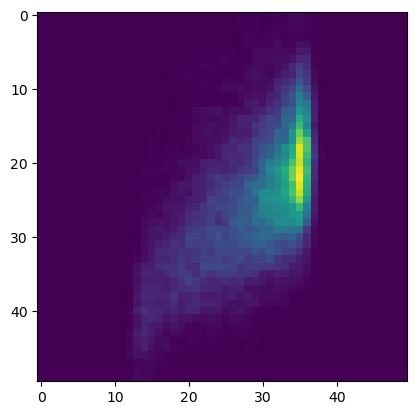

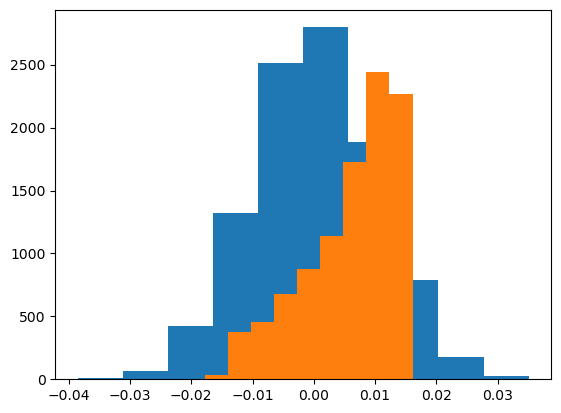

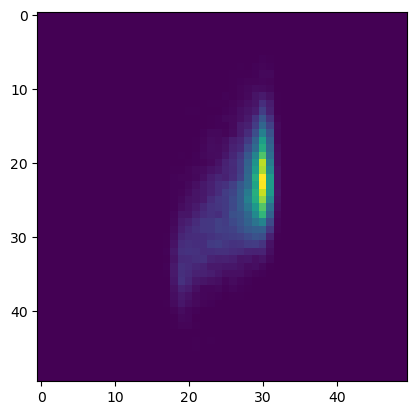

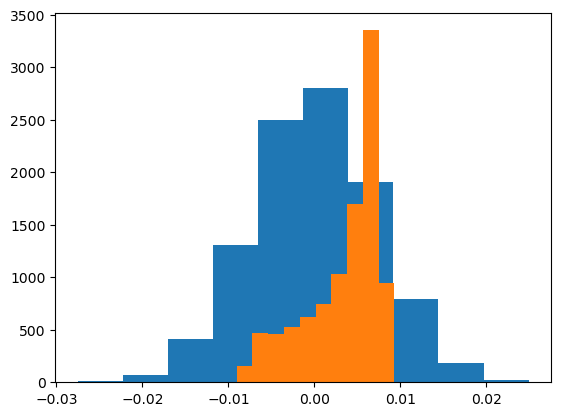

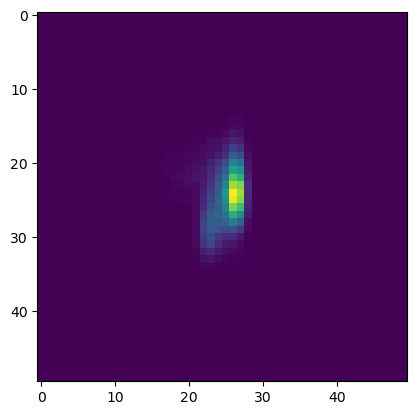

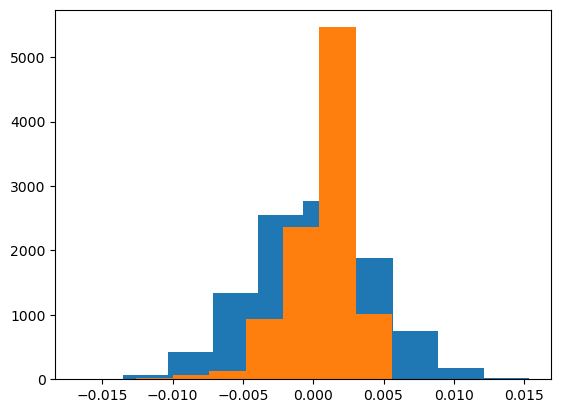

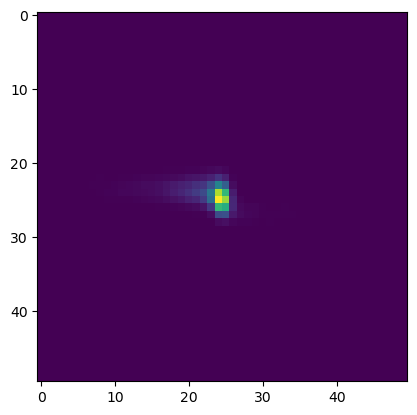

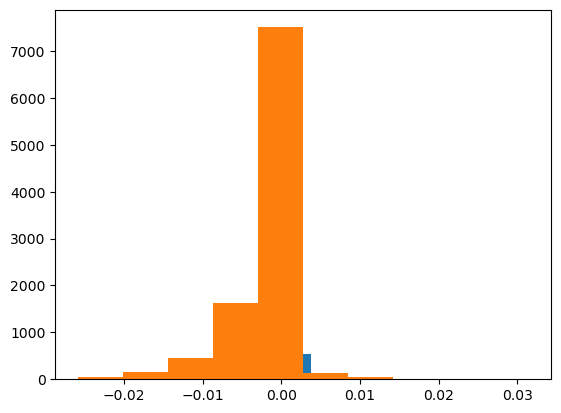

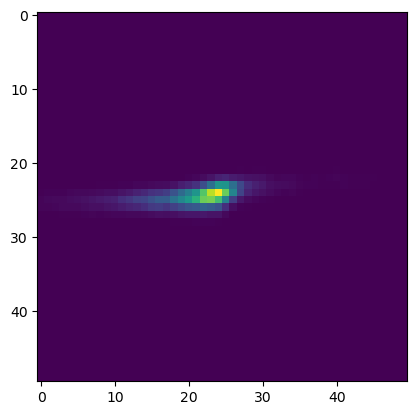

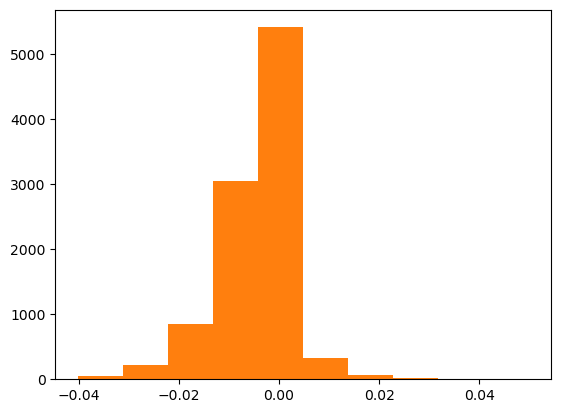

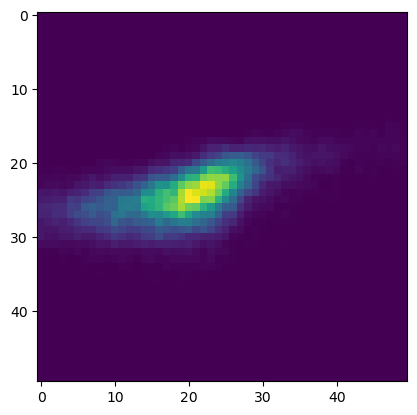

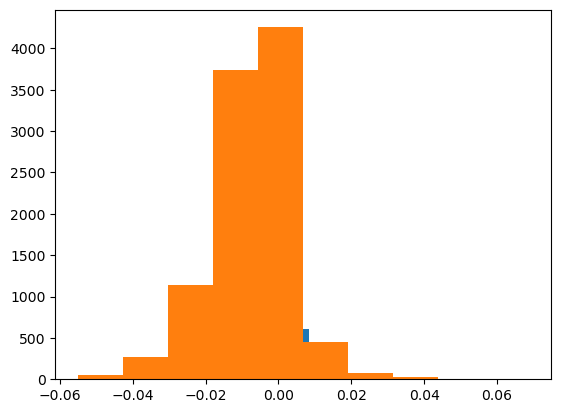

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1626099209167205e-05
beta 2.578324657244743
alpha 0.9901471773786675
gamma 0.7680923452778963


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0100999839150222e-06
beta 8.95567400829303
alpha 4.977437167154946
gamma 2.878050354346049


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([   4.,   56.,  371., 1245., 2369., 2829., 2044.,  860.,  195.,
          27.]),
 array([-0.07892594, -0.06409983, -0.04927372, -0.03444761, -0.0196215 ,
        -0.0047954 ,  0.01003071,  0.02485682,  0.03968293,  0.05450904,
         0.06933515]),
 <BarContainer object of 10 artists>)

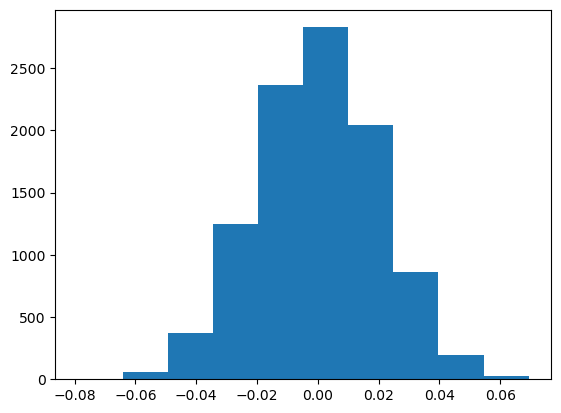

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [10]:
from fitting import train_single_model

0 tensor(68668032., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(4960837., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(4420424., device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(4521088.5000, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(3760240.2500, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(3792889.7500, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(3972638.2500, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(3712963.5000, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(3613692.7500, device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(3011115., device='cuda:0', grad_fn=<MulBackward0>)


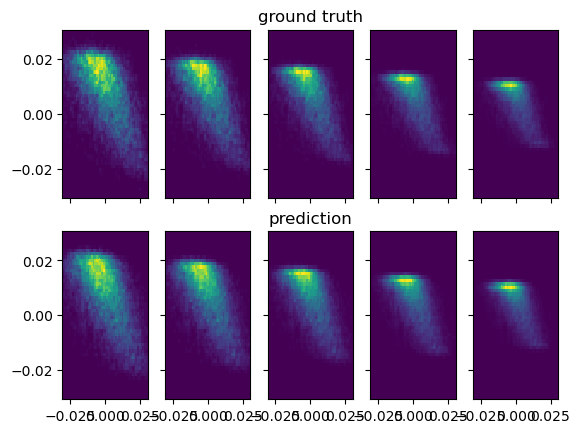

In [11]:
train_single_model()